Lab 5 | Autocorrelation
Made by Dmitriy Sokolov, 3530901/00203

Firstly, prepare the environment

In [1]:
from labs.install_deps import require_think_dsp

require_think_dsp()

thinkdsp.py successfully download


-----
### Part 1

Evaluate vocal pitch for different segment start time:

In [2]:
from labs.thinkdsp import read_wave

wave = read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()

Chirp's spectrum:

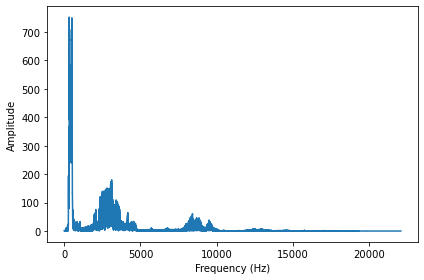

In [3]:
from labs.thinkdsp import decorate

spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Take the short segment

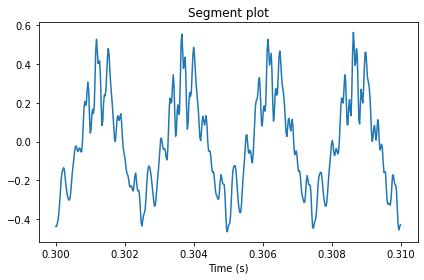

In [4]:
seg_len = 0.01
segment = wave.segment(start=0.3, duration=seg_len)
segment.plot()
decorate(xlabel='Time (s)', title="Segment plot")

Spectrum peak is near with 400 Hz

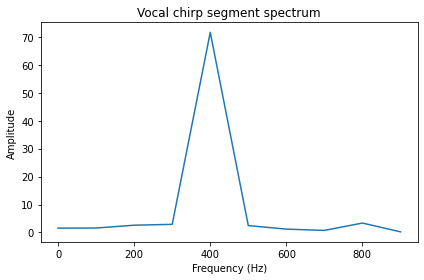

In [5]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude', title="Vocal chirp segment spectrum")

In [6]:
import numpy as np

def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr

In [7]:
def autocorr(wave):
    """Computes and plots the autocorrelation function.

    wave: Wave

    returns: tuple of sequences (lags, corrs)
    """
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

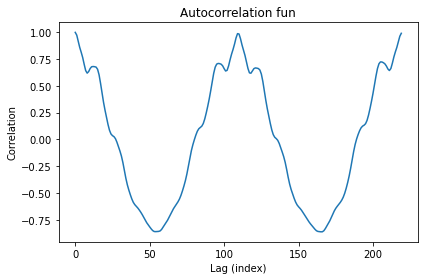

In [8]:
from labs.thinkdsp import plt
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
decorate(xlabel='Lag (index)', ylabel='Correlation', title="Autocorrelation fun")

We can see peaks at ~ 0 Hz, ~ 100 Hz and ~ 210 Hz.
Find out exact index of the peak near with 100 Hz.

In [9]:
lag = np.array(corrs[90:110]).argmax() + 90
"index of peak: " + str(lag)

'index of peak: 109'

In [10]:
period = lag / segment.framerate
period

0.002471655328798186

In [11]:
frequency = 1 / period
frequency

404.5871559633028

Our pitch height is near 404 Hz.

-----

### Part 2

Encapsulate the code (autocorrelation usage for fundamental freq measurement of periodic signal) in `estimate_fundamental` fun and use it for pitch height measurement.

In [12]:
def estimate_fundamental(segment, low=70, high=150):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

And evaluate frequency of the previous *segment*

In [13]:
freq = estimate_fundamental(segment)
freq

404.5871559633028

Now, track pitch over the sample.

In [14]:
step = 0.05
starts = np.arange(0.0, 1.4, step)

ts = []
freqs = []

for start in starts:
    ts.append(start + step/2)
    segment = wave.segment(start=start, duration=seg_len)
    freq = estimate_fundamental(segment)
    freqs.append(freq)

And superimpose pitch-tracking curve on the spectrogram:

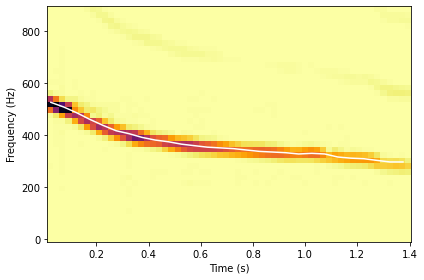

In [15]:
wave.make_spectrogram(2048).plot(high=900)
plt.plot(ts, freqs, color='white')
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Looks well!

-----

### Part 3

Compute autocorrelation of prices in BitCoin payment system using BitCoin price from the `lab4`:
[BitCoin Price](./../lab4/BTC-USD_2023.csv)

How quick fall of autocorrelation function? Is it periodic process?

In [16]:
import pandas as pd

df = pd.read_csv('./../lab4/BTC-USD_2023.csv', parse_dates=[0])

ys = df['Close']
ts = df.index

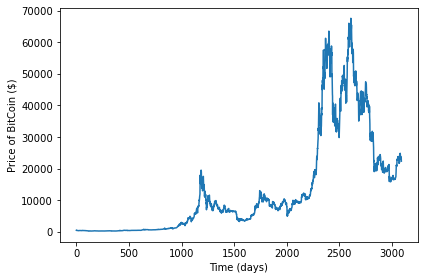

In [17]:
from labs.thinkdsp import Wave

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)', ylabel='Price of BitCoin ($)')

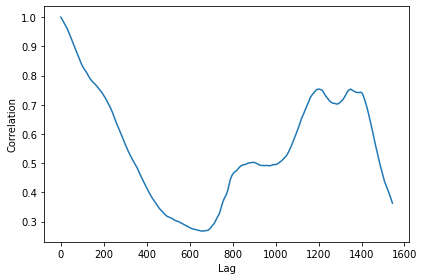

In [18]:
lags, corrs = autocorr(wave)
plt.plot(lags, corrs)
decorate(xlabel='Lag', ylabel='Correlation')

The autocorrelation function drops off slowly as lag increases, but then it grows and extremely falls.
It seems like some periodic process (when correlation is growing), but actually, it is too far from real periodical process.

-----

### Part 4

Download the notepad, called `saxophone.ipynb` and run it. Modify the segment and rerun.

[saxophone.ipynb](https://github.com/AllenDowney/ThinkDSP/blob/master/code/saxophone.ipynb)